<h1>Getting Started</h1>

Importing all the required libraries before going further into the problem

In [77]:
import numpy as np
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import folium
print('All Libraries Imported')

All Libraries Imported


<h2>Data Acqusition and Cleaning </h2>

Importing the data files which are in the file format .csv of Toronto and Newyork from the previous notebooks in which some scraping and preprocessing of the data is done

In [12]:
#by using pandas importing the .csv files in the form of a data frame
Toronto = pd.read_csv('Toronto.csv')
Newyork = pd.read_csv('NewYork.csv')
Newyork.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [13]:
Toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West , Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar , The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In this project we will deal with the neighborhoods in Manhattan of NewYork city and of the neighborhoods of Toronto specifically

In [16]:
#dropping the Postal Code column in Toronto as it is of no use 
Toronto.drop('PostalCode',1,inplace = True)
Toronto.head()

,Borough,Neighborhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West , Riverdale",43.679557,-79.352188
2,East Toronto,"India Bazaar , The Beaches West",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


Obtaining the venue details in the neighborhoods by requesting API's from the Foursquare 

In [18]:
#The details for API calls 
limit = 100
radius = 500
client_id = 'UD3APJJHD41HZJV1OFAGV4GD35MYPGJRE1OK41S0KBYHZMX0'
client_secret = 'BGMVWUEYEE445XZCFP4MKEO4U0ASOJT03IICV1IW2E2TYOQY'
version = 20200424

Defining a function for getting  the venues

In [43]:
def Get_Venues(neighborhood , lat , lng):
    _venues_ = []
    for neigh , lat , lng in zip(neighborhood,lat,lng):
        print(neigh)
        #API request url
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(client_id, client_secret,version, lat, lng, radius, limit)
        venue_details =  requests.get(url).json()
        
        _venues_.append([(
            neigh, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_details["response"]['groups'][0]['items']])
        
        #converting it into a data frame
        all_venues = pd.DataFrame([element for venue in _venues_ for element in venue])
        all_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(all_venues)

Combining both the dataframes of Toronto and Newyork and request the API at a time using the function above to get the venues in the neighborhoods

In [44]:
df = pd.concat([Toronto,Newyork],ignore_index = True)
df.head()

,Borough,Neighborhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West , Riverdale",43.679557,-79.352188
2,East Toronto,"India Bazaar , The Beaches West",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


In [46]:
df_venues = Get_Venues(df['Neighborhood'],df['Latitude'],df['Longitude'])

The Beaches
The Danforth West , Riverdale
India Bazaar , The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park , Summerhill East
Summerhill West , Rathnelly , South Hill , Forest Hill SE , Deer Park
Rosedale
St. James Town , Cabbagetown
Church and Wellesley
Regent Park , Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond , Adelaide , King
Harbourfront East , Union Station , Toronto Islands
Toronto Dominion Centre , Design Exchange
Commerce Court , Victoria Hotel
Roselawn
Forest Hill North & West
The Annex , North Midtown , Yorkville
University of Toronto , Harbord
Kensington Market , Chinatown , Grange Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Stn A PO Boxes
First Canadian Place , Underground city
Christie
Dufferin , Dovercourt Village
Little Portugal , Trinity
Brockton , Parkdale Village , Exhibition Place
High Park , 

In [47]:
df_venues.to_csv('All_venues.csv')

In [128]:
df_venues.shape
df_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West , Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


There are about 4580 venues in all the neighborhoods combined.


<h2>Exploring and Anaylzing The Data</h2>

creating another dataframe on different categories of venues in the corresponding neighborhoods for more analyzation of data

In [129]:
#using one-hot encoding to get the venue categories
df_categories = pd.get_dummies(df_venues[['Venue Category']] , prefix = '' ,prefix_sep = '')
df_categories['Neighborhood'] = df_venues['Neighborhood']
df_categories.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are about a total <strong>367 Venue categories</strong> present in all the neighborhoods combined 

In [130]:
df_mean = df_categories.groupby('Neighborhood').mean().reset_index()
df_mean.shape

(79, 367)

To find out the popular or the most commonly suggested venue categories we will form a dataframe so that we can even consider this aspect of the neighborhood

In [131]:
#function to get the most common venues of a neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [132]:
num_top_venues = 10

indt = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for indice in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(indice+1, indt[indice]))
    except:
        columns.append('{}th Most Common Venue'.format(indice+1))

# create a new dataframe
df_common = pd.DataFrame(columns=columns)
df_common['Neighborhood'] = df_mean['Neighborhood']

for ind in np.arange(df_mean.shape[0]):
    df_common.iloc[ind, 1:] = return_most_common_venues(df_mean.iloc[ind, :], num_top_venues)

df_common.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Memorial Site,Boat or Ferry,Food Court,Shopping Mall,Burger Joint,Plaza,Italian Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Seafood Restaurant,Bakery,Café,Farmers Market,Italian Restaurant,Beer Bar,Restaurant
2,"Brockton , Parkdale Village , Exhibition Place",Café,Breakfast Spot,Coffee Shop,Grocery Store,Italian Restaurant,Bakery,Nightclub,Climbing Gym,Restaurant,Performing Arts Venue
3,Business reply mail Processing CentrE,Light Rail Station,Yoga Studio,Auto Workshop,Recording Studio,Restaurant,Park,Skate Park,Smoke Shop,Burrito Place,Spa
4,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Terminal,Airport Lounge,Boutique,Sculpture Garden,Coffee Shop,Rental Car Location,Harbor / Marina,Boat or Ferry,Plane


By this we can observe that the most common venue category in Battery Park City is Park and so on like that by this dataframe.
For people who are more particular or specific about these kind of things....here's the data they can look into

<h1>Clustering</h1>
Lets cluster the neighborhoods of Newyork and Toronto based on the venue categories so that we can find the similar types of neighborhoods from both the cities <br/> For this we will use the <strong>K-Means Clustering</strong> method<br/> To apply this method first we need to find the optimal number of clusters to form.<br/>
First of all we will implement <strong>PCA</strong> on the data in order to decrease dimensionality and retain the variance

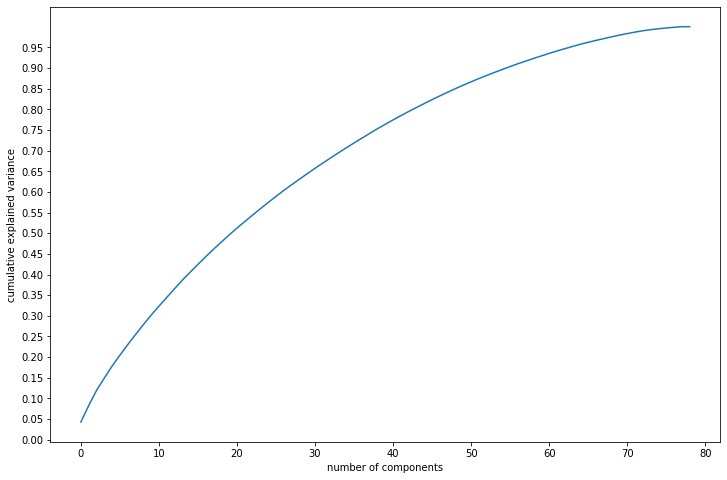

In [133]:
df_clustering = df_mean.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('PCA.png')

In [134]:
pca = PCA(n_components=70)
df_pca = pca.fit_transform(data_rescaled)
df_pca.shape

(79, 70)

We reduced the feautures to avoid overfitting by the model we generated <br/>
<h2>Elbow Method</h2>
Using the elbow method to find the optimal number of clusters for our model i.e elbow point of the graph

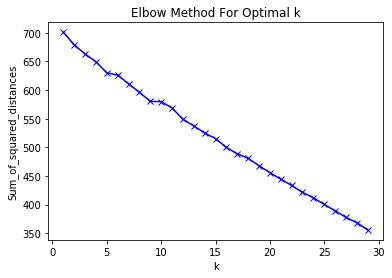

In [142]:
Sum_of_squared_distances = []
K = range(1, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.savefig('Elbow.png')
plt.show()

The Graph between Mean squared error and K was not much helpfull in finding the optimal number of clusters as the graph is almost linear

<h2>Silhouette score method</h2>
Using the Silhouette method to determine the number of clusters as the previous method was not much helpful 

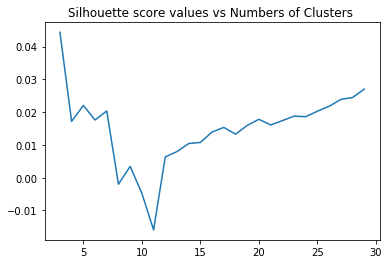

In [143]:
obs = df_pca.copy() 
silhouette_score_values=list()
 
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.savefig('SSM.png')
plt.show()
 
#Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
#print("Optimal number of components is:", Optimal_NumberOf_Components)

By the Silhouette score method we found out that the optimal value of clusters i.e 5 because if we use 3 then the number of clusters are very less so the next value of k with high sihouette score is 5.<br/>
<h2>K-Means Clustering</h2>
Now that we found out the number of optimal number of clusters we will perform the Clustering 

In [137]:
clusters = 5
kmeans  = KMeans(n_clusters=clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(df_pca)
labels = kmeans.labels_
labels

array([0, 2, 2, 2, 2, 1, 1, 3, 1, 4, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0,
       1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 4, 2, 2, 1, 2, 1, 4,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2])

In [138]:
df_mean.insert(0, 'Cluster_Labels', kmeans.labels_)

In [139]:
df_mean.shape

(79, 368)

<h1>Data Visualization </h1>
Now we will seperate the neighborhoods of Toronto and Newyork along with their cluster labels as to visualize them

In [122]:
df_CN = df_mean[['Cluster_Labels','Neighborhood']]
df_NewYork = pd.merge(Newyork[['Neighborhood','Latitude','Longitude']],df_CN ,on = 'Neighborhood')
df_NewYork.shape

(40, 4)

In [123]:
df_Toronto = pd.merge(Toronto[['Neighborhood','Latitude','Longitude']] ,df_CN ,on = 'Neighborhood' )
df_Toronto.shape

(39, 4)

<h1>Lets visualize the clusters of the cities in Folium Map</h1>
<br/><h2>First visualize the city of NewYork</h2>

In [124]:
# create map
map_NY = folium.Map(location=[40.7831, -73.9712], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_NewYork['Latitude'], df_NewYork['Longitude'], df_NewYork['Neighborhood'], df_NewYork['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_NY)
       
map_NY

<h2>City of Toronto</h2>

In [125]:
# create map
map_T = folium.Map(location=[43.6532, -79.3832], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Neighborhood'], df_Toronto['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_T)
       
map_T

<h1>Conclusion</h1>
We can visualize the similar type of neighborhoods from both the cities with these maps<br/>The circle Markers with same color markers are similar to each other based on the venue categories present in their corresponding neighborhoods